<h1>
DSBA 6162
</h1>
<h2>
Team 2:  Jon-Michael Hancock, Storm King, Matt Thayer, Mike Weinberg, Dave Wool
 </h2>

Our data source is <a href="https://covidtracking.com/data/api></a>, which allows us to download selected data for particular states or the entire United States.  We generated a csv file of daily data for North Carolina.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# The first step is to read the csv file into a data frame.  There are approximately 40 columns, and we are
# selecting four.  We will also convert dates to the datetime type as we read.

# We will also rename some fields for clarity
nc = pd.read_csv('NC.csv', usecols=['date', 'state', 'positive', 'negative'], \
                 parse_dates=[0], infer_datetime_format=True)

nc.rename(columns={'date':'report_date', 'positive':'pos_today', 'negative':'neg_today'}, inplace=True)

In [25]:
# Adding a column for the date of the mask order, the days elapsed after/before the mask order date and a
# placeholder for the daily increase/decrease in cases
nc.insert(1, 'mask_order_date', pd.to_datetime('2020-06-24'))
nc.insert(2, 'days_bef_after_mask_order', nc['report_date'] - nc['mask_order_date'])
nc.insert(4, 'pos_growth', 0)

In [32]:
# Fill the daily increase/decrease by computing it
# Add column to show daily growth in positive cases
row_count = nc.shape[0]
for index in range(0, row_count-1):
    n_today     = nc.iloc[index]['pos_today']
    n_yesterday = nc.iloc[index+1]['pos_today']
    growth = n_today - n_yesterday
    nc.at[index, 'pos_growth'] = growth

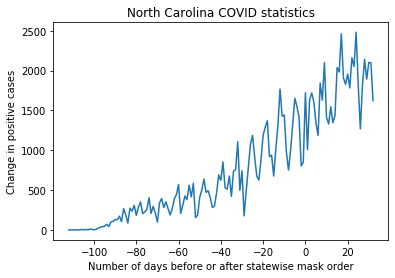

In [33]:
# Plot the daily increase/decrease in cases by day, with the date the mask order was applied as "Day 0"
plt.plot(nc['days_bef_after_mask_order'].dt.days.astype('int16'), nc['pos_growth'])
plt.title('North Carolina COVID statistics')
plt.xlabel('Number of days before or after statewise mask order')
plt.ylabel('Change in positive cases')
plt.show()
